In [1]:
import glob, pathlib, json, sys
sys.path.append(r"D:\BEHAVIOR-1K\asset_pipeline")
import b1k_pipeline.utils

In [ ]:
provided = set()
no_objects = []
for target in b1k_pipeline.utils.get_targets("objects"):
    if not target.startswith("objects/legacy"):
        continue
        
    j_path = b1k_pipeline.utils.PIPELINE_ROOT / "cad" / target / "artifacts/object_list.json"
    with open(j_path, "r") as f:
        object_list = json.load(f)
        
    if len(object_list["provided_objects"]) == 0:
        no_objects.append(target)
        
    provided.update(set(object_list["provided_objects"]))
    
print("These targets provide no objects:")
print(no_objects)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\BEHAVIOR-1K\\asset_pipeline\\cad\\objects\\legacy_juice-bbewjo\\artifacts\\object_list.json'

In [20]:
provided

{'necklace-wzmleo',
 'oven-nvqqkv',
 'bagel-zlxkry',
 'dishtowel-ltydgg',
 'whiteboard-bqqmtc',
 'beef-vdfkby',
 'pool_table-atjfhn',
 'bathtub-wxrafq',
 'bottom_cabinet-smujam',
 'chestnut-fmomat',
 'sink-zexzrc',
 'top_cabinet-yegcau',
 'bottom_cabinet-dajebq',
 'toilet-jkwccu',
 'sunglass-nxfifs',
 'bottom_cabinet_no_top-wamrju',
 'jar-wvgsqk',
 'bottom_cabinet-vceupd',
 'duffel_bag-ozykxk',
 'protein_powder-rbvrrp',
 'bed-wfxgbb',
 'pitcher-tzbnmh',
 'armchair-jmunen',
 'scissors-hqfure',
 'pencil-lrwosa',
 'coconut-txtabm',
 'floor_lamp-lqdmym',
 'wall_mounted_tv-ylvjhb',
 'table_lamp-htinka',
 'straight_chair-xfhcep',
 'washer-xusefg',
 'pillow-rhewoi',
 'top_cabinet-lsyzkh',
 'trash_can-rteihy',
 'wrapped_gift-wpmksn',
 'sock-rhgweu',
 'board_game-lzslbu',
 'standing_tv-wbkvxr',
 'breakfast_table-sfxqtk',
 'briefcase-ohelib',
 'cereal-hcwbzw',
 'swivel_chair-yiphfr',
 'window-tuztdv',
 'paper_bag-bzsxgw',
 'carpet_sweeper-xboreo',
 'bottom_cabinet-sxppcj',
 'bottom_cabinet-ttmej

In [25]:
# What objects are missing from the model rename list
import yaml
with open(r"D:\BEHAVIOR-1K\asset_pipeline\b1k_pipeline\model_rename.yml", "r") as f:
    translation_dict = yaml.load(f, yaml.SafeLoader)
    expected = set(x.replace("/", "-") for x in translation_dict.values())
missing = sorted(expected - provided)
print(missing)

['car-takwdb', 'container_date-qqddba', 'door-rrsovh', 'juice-bbewjo', 'kettle-tsyims', 'kettle-tzbnmh', 'martini-xevdnl', 'olive_oil-cqycjk', 'olive_oil-luikop', 'olive_oil-lvsfgc', 'salt-iomwtn', 'sheet-czdhwu', 'soap-ozifwa', 'water-emquat']


In [26]:
# For each of the above, what is their file exporting
for m in missing:
    target = f"objects/legacy_{m}"
    j_path = b1k_pipeline.utils.PIPELINE_ROOT / "cad" / target / "artifacts/object_list.json"
    if not j_path.exists():
        print(f"{m} file is missing.")
        continue
    
    with open(j_path, "r") as f:
        object_list = json.load(f)
        
    if len(object_list["provided_objects"]) == 0:
        print(f"{m} file provides no objects")
    else:
        other = ", ".join(object_list["provided_objects"])
        print(f"{m} file provides other objects: {other}")

car-takwdb file is missing.
container_date-qqddba file provides other objects: date-kdfasq, date-lskefl, date-pfdasw
door-rrsovh file is missing.
juice-bbewjo file provides no objects
kettle-tsyims file provides other objects: pitcher-tsyims
kettle-tzbnmh file provides other objects: pitcher-tzbnmh
martini-xevdnl file provides other objects: cocktail_glass-xevdnl
olive_oil-cqycjk file provides other objects: olive_oil_bottle-cqycjk
olive_oil-luikop file provides other objects: olive_oil_bottle-luikop
olive_oil-lvsfgc file provides other objects: olive_oil_bottle-lvsfgc
salt-iomwtn file provides other objects: salt_shaker-iomwtn
sheet-czdhwu file provides no objects
soap-ozifwa file provides other objects: bar_soap-ozifwa
water-emquat file provides other objects: cap-gmdwwe, water_bottle-emquat


In [88]:
import sys, os
sys.path.append(r"D:\BEHAVIOR-1K\asset_pipeline")
from b1k_pipeline.urdfpy import URDF

import numpy as np
import tqdm

# Check the joints from the original files
problem_objects = {}
problem_joint_limits = []
for k, v in tqdm.tqdm(translation_dict.items()):
    old_category_name, old_model_name = k.split("/")
    model_dir = os.path.join(r"C:\Users\Cem\research\iGibson-dev\igibson\data\ig_dataset", "objects", old_category_name, old_model_name)

    # Load the URDF file into urdfpy
    urdf_filename = old_model_name + ".urdf"
    urdf_path = os.path.join(model_dir, urdf_filename)
    robot = URDF.load(urdf_path)

    # Check joint limits
    problem_joints = [j for j in robot.joints if j.joint_type == "revolute" and np.abs(np.rad2deg(j.limit.upper - j.limit.lower)) >= 179]
    problem_joint_limits.extend([np.abs(np.rad2deg(joint.limit.upper - joint.limit.lower)) for joint in robot.joints if joint.joint_type == "revolute"])
    if problem_joints:
        problem_objects[v] = [j.child for j in problem_joints]


100%|████████████████████████████████████████████████████████████████████████| 1216/1216 [01:30<00:00, 13.38it/s]


In [89]:
print(problem_objects)

{'bottom_cabinet/immwzb': ['link_0'], 'bottom_cabinet/hrdeys': ['link_0', 'link_1'], 'bottom_cabinet/xiurwn': ['link_0', 'link_1'], 'bottom_cabinet/plccav': ['dof_rootd_Ba001_r', 'dof_rootd_Bb001_r'], 'bottom_cabinet_no_top/vdedzt': ['link_0', 'link_1'], 'briefcase/rxvbea': ['link_2'], 'briefcase/ohelib': ['link_0', 'link_1'], 'briefcase/fdpjtj': ['link_0', 'link_1'], 'carton/causya': ['link_0', 'link_1', 'link_2', 'link_3'], 'dryer/wivnic': ['dof_rootd_Aa001_r'], 'floor_lamp/pfuqec': ['link_0', 'link_1'], 'fridge/hivvdf': ['link_0'], 'jar/vzwhbg': ['rb1'], 'laptop/nvulcs': ['link_0'], 'package/msfzpz': ['link_0', 'link_1', 'link_2', 'link_3'], 'stove/qbjiva': ['link_4', 'link_5', 'link_7', 'link_8', 'link_9', 'link_10'], 'table_lamp/tggobp': ['link_1'], 'table_lamp/zpqejt': ['link_2'], 'trash_can/pdmzhv': ['link_2'], 'trash_can/nuoypc': ['link_2'], 'trash_can/mdojox': ['link_2'], 'trash_can/ifzxzj': ['link_0'], 'window/mjssrd': ['link_0', 'link_1', 'link_2', 'link_3']}


In [90]:
print(len(problem_objects))

23


In [91]:
print(len(problem_joint_limits))

378


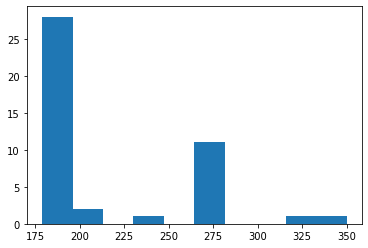

17


In [92]:
import matplotlib.pyplot as plt
x = np.array(problem_joint_limits)
plt.hist(x[x>=179], bins=10)
plt.show()
print(len(x[x>=181]))

In [97]:
# Check that the corresponding file exists for all
targets = []
for po_name, joints in problem_objects.items():
    obj_name = po_name.replace("/", "-")
    target = "objects/legacy_" + obj_name
    targets.append(target)
    
    filename = b1k_pipeline.utils.PIPELINE_ROOT / "cad" / target
    assert filename.exists(), str(filename)
    print(filename, "exists")
    
    # Get the corresponding object list
    obj_list = filename / "artifacts/object_list.json"
    assert obj_list.exists(), "No obj list for " + str(filename)
    with open(obj_list, "r") as f:
        meshes = json.load(f)["meshes"]
        
    joint_failures = []
    for joint in joints:
        # Check that some link with this name exists
        this_link_name = f"{obj_name}-0-{joint}".lower()
        link_meshes = [x for x in meshes if b1k_pipeline.utils.parse_name(x)["link_basename"] == this_link_name]
        if not link_meshes:
            joint_failures.append(this_link_name)
    if joint_failures:
        print(f"Could not find joints {joint_failures}. Mesh list: {meshes}")


D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_bottom_cabinet-immwzb exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_bottom_cabinet-hrdeys exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_bottom_cabinet-xiurwn exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_bottom_cabinet-plccav exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_bottom_cabinet_no_top-vdedzt exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_briefcase-rxvbea exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_briefcase-ohelib exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_briefcase-fdpjtj exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_carton-causya exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_dryer-wivnic exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_floor_lamp-pfuqec exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_fridge-hivvdf exists
D:\BEHAVIOR-1K\asset_pipeline\cad\objects\legacy_jar-vzwhbg exists
D:\BEHAVIOR-1K\asset_pipeline\cad\

In [100]:
print("dvc unprotect", "\n".join("cad/" + x + "/processed.max" for x in targets))

dvc unprotect cad/objects/legacy_bottom_cabinet-immwzb/processed.max cad/objects/legacy_bottom_cabinet-hrdeys/processed.max cad/objects/legacy_bottom_cabinet-xiurwn/processed.max cad/objects/legacy_bottom_cabinet-plccav/processed.max cad/objects/legacy_bottom_cabinet_no_top-vdedzt/processed.max cad/objects/legacy_briefcase-rxvbea/processed.max cad/objects/legacy_briefcase-ohelib/processed.max cad/objects/legacy_briefcase-fdpjtj/processed.max cad/objects/legacy_carton-causya/processed.max cad/objects/legacy_dryer-wivnic/processed.max cad/objects/legacy_floor_lamp-pfuqec/processed.max cad/objects/legacy_fridge-hivvdf/processed.max cad/objects/legacy_jar-vzwhbg/processed.max cad/objects/legacy_laptop-nvulcs/processed.max cad/objects/legacy_package-msfzpz/processed.max cad/objects/legacy_stove-qbjiva/processed.max cad/objects/legacy_table_lamp-tggobp/processed.max cad/objects/legacy_table_lamp-zpqejt/processed.max cad/objects/legacy_trash_can-pdmzhv/processed.max cad/objects/legacy_trash_c

In [105]:
print("\n".join('"' + x.replace("/", "-") + '",' for x in problem_objects.keys()))

"bottom_cabinet-immwzb",
"bottom_cabinet-hrdeys",
"bottom_cabinet-xiurwn",
"bottom_cabinet-plccav",
"bottom_cabinet_no_top-vdedzt",
"briefcase-rxvbea",
"briefcase-ohelib",
"briefcase-fdpjtj",
"carton-causya",
"dryer-wivnic",
"floor_lamp-pfuqec",
"fridge-hivvdf",
"jar-vzwhbg",
"laptop-nvulcs",
"package-msfzpz",
"stove-qbjiva",
"table_lamp-tggobp",
"table_lamp-zpqejt",
"trash_can-pdmzhv",
"trash_can-nuoypc",
"trash_can-mdojox",
"trash_can-ifzxzj",
"window-mjssrd",
